In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.core.pylabtools import figsize

figsize(12, 12)


sns.set()

In [2]:
test_set = pd.read_csv('test.csv', index_col = 0)
test_set.sample(1).T

NU_INSCRICAO,36842230ef9a0dcb5d659866244e1632c86bd3d3
CO_UF_RESIDENCIA,31
SG_UF_RESIDENCIA,MG
NU_IDADE,16
TP_SEXO,F
TP_COR_RACA,1
TP_NACIONALIDADE,1
TP_ST_CONCLUSAO,3
TP_ANO_CONCLUIU,0
TP_ESCOLA,1
TP_ENSINO,NaN


In [3]:
lista = test_set.columns.tolist()
print(lista)

['CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']


In [4]:
print('Número de features presentes no test_set', test_set.shape[1])

Número de features presentes no test_set 46


In [5]:
enem_df = pd.read_csv("train.csv", nrows = 0, index_col = 0)

In [6]:
enem_df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050


In [7]:
print('O número de features no dataset que será analisado =  {}'.format(enem_df.shape[1]))

O número de features no dataset que será analisado =  166


In [8]:
print('O nome das features presentes no dataset de treino são: \n', enem_df.columns.tolist())

O nome das features presentes no dataset de treino são: 
 ['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18', 'IN_LEDOR', 'IN_

### Escolha das variáveis para o modelo

Depois de estudar o dicionário do enem de 2016, que o conjunto de dados que será utilizado para estimar a nota de matemática no arquivo de testes. No train.set temos 165 variáveis(o número de inscrição não é feature). A maioria destas features não são relevantes para a estimação da nota, portanto após estudar o dicionário. Iremos trabalhar com as seguintes features.

* NU_IDADE - idade
* TP_COR_RAÇA - cor/raça
* TP_ST_CONCLUSAO - Situação de conclusão do ensino Médio
* TP_ESCOLA - Tipo de escola do Ensino Médio
* TP_ENSINO - Tipo de instituição que concluiu ou concluíra o Ensino Médio
* NU_NOTA_CN - Nota da prova de Ciências da Natureza.
* NU_NOTA_CH - Nota da prova de Ciências Humana.
* NU_NOTA_LC - Nota da prova de Linguagens e Códigos.
* NU_NOTA_MT - Nota da prova de Matemática
* TP_LINGUA - Lingua Estrangeira
* Q001 - Até que série seu pai, ou o homem responsável por você, estudou?
* Q002 - Até que série sua mãe, ou a mulher responsável por você, estudou?
* Q042 - Em que tipo de escola vc frequentou o Ensino Fundamental ?
* Q043 - Modalidade de Ensino Fundamental frequentada.
* Q047 - Em que tipo de escola você frequentou o Ensino Médio?
* Q048 - Modalidade de Ensino Médio frequentada.
* Q050 - Durante o Ensino Médio, vc abandonou os estudos por algum tempo e/ou foi reprovado?


In [9]:
# Escolha de features para análise
cols = ['NU_INSCRICAO', 'NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ENSINO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA', 'Q001', \
       'Q002', 'Q042', 'Q043', 'Q047', 'Q048', 'Q050']
vars = ['NU_INSCRICAO','CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047', 'NU_NOTA_MT']

In [10]:
enem_df = pd.read_csv("train.csv", usecols = vars)

In [11]:
enem_df.head().T

,0,1,2,3,4
NU_INSCRICAO,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2c3acac4b33ec2b195d77e7c04a2d75727fad723,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268
CO_UF_RESIDENCIA,43,23,23,33,13
SG_UF_RESIDENCIA,RS,CE,CE,RJ,AM
NU_IDADE,24,17,21,25,28
TP_SEXO,M,F,F,F,M
TP_COR_RACA,1,3,3,0,2
TP_NACIONALIDADE,1,1,1,1,1
TP_ST_CONCLUSAO,1,2,3,1,1
TP_ANO_CONCLUIU,4,0,0,9,4
TP_ESCOLA,1,2,1,1,1


In [12]:
training_df = enem_df['NU_INSCRICAO']

In [13]:
# Dropando o número de inscrição, não serve pra muita coisa 
enem_df.drop(['NU_INSCRICAO'], axis = 1, inplace = True)

In [14]:
enem_df.sample(5)

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
12125,31,MG,33,F,1,1,1,1,1,NaN,...,60.0,360.0,B,F,B,B,B,B,B,A
2043,35,SP,19,M,1,1,1,2,1,NaN,...,80.0,460.0,D,D,H,B,B,C,E,A
3117,33,RJ,20,M,1,1,1,3,1,NaN,...,160.0,860.0,F,G,F,B,B,A,NaN,A
6451,31,MG,17,F,1,1,2,0,2,1.0,...,60.0,520.0,C,E,G,B,B,A,NaN,A
7578,33,RJ,27,M,1,1,2,0,2,3.0,...,140.0,540.0,B,B,F,B,B,C,F,A


In [15]:
enem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CO_UF_RESIDENCIA        13730 non-null  int64  
 1   SG_UF_RESIDENCIA        13730 non-null  object 
 2   NU_IDADE                13730 non-null  int64  
 3   TP_SEXO                 13730 non-null  object 
 4   TP_COR_RACA             13730 non-null  int64  
 5   TP_NACIONALIDADE        13730 non-null  int64  
 6   TP_ST_CONCLUSAO         13730 non-null  int64  
 7   TP_ANO_CONCLUIU         13730 non-null  int64  
 8   TP_ESCOLA               13730 non-null  int64  
 9   TP_ENSINO               4282 non-null   float64
 10  IN_TREINEIRO            13730 non-null  int64  
 11  TP_DEPENDENCIA_ADM_ESC  4282 non-null   float64
 12  IN_BAIXA_VISAO          13730 non-null  int64  
 13  IN_CEGUEIRA             13730 non-null  int64  
 14  IN_SURDEZ               13730 non-null

### Pre-processamento dos dados
1 - Verificação e quantificação de dados faltantes

In [16]:
print(enem_df.isnull().sum())

CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
NU_NOTA_MT                3597
TP_LINGUA                    0
TP_STATU

In [17]:
print(enem_df.shape)

(13730, 47)


Das informações acima vemos que há variáveis com um grande número de dados faltantes, a coluna que mais preocupa é a __NU_NOTA_MT__ que é a nossa variável target. Para este caso, como a nota de matemática é a variável que queremos estimar, nenhuma linha que contenha esse dado faltante, poderá ser usada para predição, portanto droparemos esses linhas.

### Análise de completude e tipos de variáveis

In [18]:
completude = pd.DataFrame({
        'colunas' : enem_df.columns,
        'tipo'    : enem_df.dtypes,
        'missing' : enem_df.isna().sum(),
        'size'    : enem_df.shape[0],
        'unicos'  : enem_df.nunique()
})

completude['percentual'] = round(completude['missing'] / completude['size'], 2)

In [19]:
completude.head(47)

,colunas,tipo,missing,size,unicos,percentual
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA,int64,0,13730,27,0.00
SG_UF_RESIDENCIA,SG_UF_RESIDENCIA,object,0,13730,27,0.00
NU_IDADE,NU_IDADE,int64,0,13730,55,0.00
TP_SEXO,TP_SEXO,object,0,13730,2,0.00
TP_COR_RACA,TP_COR_RACA,int64,0,13730,6,0.00
TP_NACIONALIDADE,TP_NACIONALIDADE,int64,0,13730,5,0.00
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0,13730,4,0.00
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0,13730,11,0.00
TP_ESCOLA,TP_ESCOLA,int64,0,13730,4,0.00
TP_ENSINO,TP_ENSINO,float64,9448,13730,3,0.69


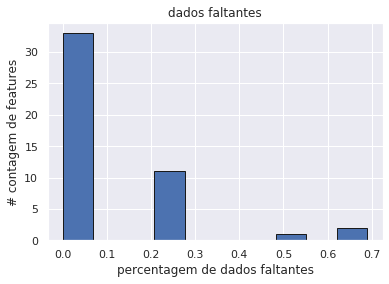

In [20]:
fig, ax = plt.subplots(figsize = (6, 4))

ax.hist(completude['percentual'], edgecolor ='k', color = 'b')

ax.set_title('dados faltantes')
ax.set_xlabel('percentagem de dados faltantes')
ax.set_ylabel('# contagem de features')
plt.show()
plt.close()

In [21]:
print('Contagem de features com até 20% de dados faltantes', completude[completude['percentual'] < 0.2].shape[0])

Contagem de features com até 20% de dados faltantes 33


In [22]:
print('Contagem de features com 0% de dados faltantes', completude[completude['percentual'] == 0].shape[0])

Contagem de features com 0% de dados faltantes 33


In [23]:
print('Contagem de features com mais de 20% de dados faltantes', completude[completude['percentual'] > 0.2].shape[0])

Contagem de features com mais de 20% de dados faltantes 14


In [24]:
print('Contagem de features com mais de 50% de dados faltantes', completude[completude['percentual'] > 0.50].shape[0])

Contagem de features com mais de 50% de dados faltantes 3


In [25]:
print('Colunas que serão descartadas por terem muitos dados faltantes \n', completude[completude['percentual'] > 0.50]['colunas'])

Colunas que serão descartadas por terem muitos dados faltantes 
 TP_ENSINO                              TP_ENSINO
TP_DEPENDENCIA_ADM_ESC    TP_DEPENDENCIA_ADM_ESC
Q027                                        Q027
Name: colunas, dtype: object


In [26]:
print('Colunas que irão precisar de algum tipo de imputação \n', completude[completude['percentual'] < 0.25]['colunas'])

Colunas que irão precisar de algum tipo de imputação 
 CO_UF_RESIDENCIA    CO_UF_RESIDENCIA
SG_UF_RESIDENCIA    SG_UF_RESIDENCIA
NU_IDADE                    NU_IDADE
TP_SEXO                      TP_SEXO
TP_COR_RACA              TP_COR_RACA
TP_NACIONALIDADE    TP_NACIONALIDADE
TP_ST_CONCLUSAO      TP_ST_CONCLUSAO
TP_ANO_CONCLUIU      TP_ANO_CONCLUIU
TP_ESCOLA                  TP_ESCOLA
IN_TREINEIRO            IN_TREINEIRO
IN_BAIXA_VISAO        IN_BAIXA_VISAO
IN_CEGUEIRA              IN_CEGUEIRA
IN_SURDEZ                  IN_SURDEZ
IN_DISLEXIA              IN_DISLEXIA
IN_DISCALCULIA        IN_DISCALCULIA
IN_SABATISTA            IN_SABATISTA
IN_GESTANTE              IN_GESTANTE
IN_IDOSO                    IN_IDOSO
TP_PRESENCA_CN        TP_PRESENCA_CN
TP_PRESENCA_CH        TP_PRESENCA_CH
TP_PRESENCA_LC        TP_PRESENCA_LC
CO_PROVA_CN              CO_PROVA_CN
CO_PROVA_CH              CO_PROVA_CH
CO_PROVA_LC              CO_PROVA_LC
CO_PROVA_MT              CO_PROVA_MT
TP_LINGUA           

Vamos descartar as features com mais de 50% de missing data, Q27, TP_ENSINO, TP_DEPENDENCIA_ADM_ESC

In [29]:
enem_df.drop(['Q027', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC'], axis = 1, inplace = True)

In [30]:
print(enem_df.isnull().sum())

CO_UF_RESIDENCIA        0
SG_UF_RESIDENCIA        0
NU_IDADE                0
TP_SEXO                 0
TP_COR_RACA             0
TP_NACIONALIDADE        0
TP_ST_CONCLUSAO         0
TP_ANO_CONCLUIU         0
TP_ESCOLA               0
IN_TREINEIRO            0
IN_BAIXA_VISAO          0
IN_CEGUEIRA             0
IN_SURDEZ               0
IN_DISLEXIA             0
IN_DISCALCULIA          0
IN_SABATISTA            0
IN_GESTANTE             0
IN_IDOSO                0
TP_PRESENCA_CN          0
TP_PRESENCA_CH          0
TP_PRESENCA_LC          0
CO_PROVA_CN             0
CO_PROVA_CH             0
CO_PROVA_LC             0
CO_PROVA_MT             0
NU_NOTA_CN           3389
NU_NOTA_CH           3389
NU_NOTA_LC           3597
NU_NOTA_MT           3597
TP_LINGUA               0
TP_STATUS_REDACAO    3597
NU_NOTA_COMP1        3597
NU_NOTA_COMP2        3597
NU_NOTA_COMP3        3597
NU_NOTA_COMP4        3597
NU_NOTA_COMP5        3597
NU_NOTA_REDACAO      3597
Q001                    0
Q002        

In [31]:
enem_df.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,43,RS,24,M,1,1,1,4,1,0,...,80.0,80.0,520.0,D,D,C,A,A,C,A
1,23,CE,17,F,3,1,2,0,2,0,...,120.0,80.0,580.0,A,A,B,A,A,A,A
2,23,CE,21,F,3,1,3,0,1,0,...,NaN,NaN,NaN,D,D,C,A,A,A,A
3,33,RJ,25,F,0,1,1,9,1,0,...,NaN,NaN,NaN,H,E,E,C,B,C,D
4,13,AM,28,M,2,1,1,4,1,0,...,NaN,NaN,NaN,E,D,C,A,A,B,A


In [32]:
completude = pd.DataFrame({
        'colunas' : enem_df.columns,
        'tipo'    : enem_df.dtypes,
        'missing' : enem_df.isna().sum(),
        'size'    : enem_df.shape[0],
        'unicos'  : enem_df.nunique()
})

completude['percentual'] = round(completude['missing'] / completude['size'], 2)

completude.head(44)

,colunas,tipo,missing,size,unicos,percentual
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA,int64,0,13730,27,0.00
SG_UF_RESIDENCIA,SG_UF_RESIDENCIA,object,0,13730,27,0.00
NU_IDADE,NU_IDADE,int64,0,13730,55,0.00
TP_SEXO,TP_SEXO,object,0,13730,2,0.00
TP_COR_RACA,TP_COR_RACA,int64,0,13730,6,0.00
TP_NACIONALIDADE,TP_NACIONALIDADE,int64,0,13730,5,0.00
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0,13730,4,0.00
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0,13730,11,0.00
TP_ESCOLA,TP_ESCOLA,int64,0,13730,4,0.00
IN_TREINEIRO,IN_TREINEIRO,int64,0,13730,2,0.00


Vamos tratar da variável target __'NU_NOTA_MT'__, vamos descartar todas as linhas aonde com NaN.

In [33]:
# Simplesmente dropando toda a linha aonde a variável target tem valor NaN na coluna 'NU_NOTA_MT'
enem_df.dropna(subset = ['NU_NOTA_MT'], axis = 0, inplace = True)

# resetando o index, porque algumas linhas foram descartadas
enem_df.reset_index(drop = True, inplace = True)

In [34]:
enem_df.sample(10)

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
534,23,CE,18,F,3,1,2,0,2,0,...,140.0,100.0,640.0,H,C,B,A,B,A,A
6864,23,CE,14,F,3,1,3,0,1,1,...,120.0,0.0,480.0,E,E,B,A,A,A,A
1497,43,RS,17,F,3,1,2,0,2,0,...,120.0,40.0,540.0,B,E,C,B,B,A,A
5857,23,CE,18,M,1,1,2,0,2,0,...,100.0,40.0,420.0,E,E,B,A,A,A,A
2531,35,SP,17,F,1,1,2,0,2,0,...,140.0,80.0,500.0,E,B,D,B,B,A,A
1187,33,RJ,18,F,3,1,2,0,2,0,...,120.0,40.0,520.0,E,B,H,B,B,A,A
2623,23,CE,20,F,3,1,1,3,1,0,...,120.0,120.0,680.0,D,D,D,B,B,C,A
4138,35,SP,18,F,3,1,1,1,1,0,...,120.0,40.0,400.0,E,G,F,B,B,A,A
9500,11,RO,32,F,2,1,1,2,1,0,...,80.0,80.0,400.0,B,G,D,A,B,A,A
10030,42,SC,16,M,1,2,3,0,1,1,...,120.0,80.0,540.0,H,A,C,B,B,A,A


In [38]:
completude2 = pd.DataFrame({
        'colunas' : enem_df.columns,
        'tipo'    : enem_df.dtypes,
        'missing' : enem_df.isna().sum(),
        'size'    : enem_df.shape[0],
        'unicos'  : enem_df.nunique()
})

completude2['percentual'] = round(completude2['missing'] / completude['size'], 2)

completude2.head(44)

,colunas,tipo,missing,size,unicos,percentual
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA,int64,0,10133,27,0.0
SG_UF_RESIDENCIA,SG_UF_RESIDENCIA,object,0,10133,27,0.0
NU_IDADE,NU_IDADE,int64,0,10133,53,0.0
TP_SEXO,TP_SEXO,object,0,10133,2,0.0
TP_COR_RACA,TP_COR_RACA,int64,0,10133,6,0.0
TP_NACIONALIDADE,TP_NACIONALIDADE,int64,0,10133,5,0.0
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0,10133,4,0.0
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0,10133,11,0.0
TP_ESCOLA,TP_ESCOLA,int64,0,10133,4,0.0
IN_TREINEIRO,IN_TREINEIRO,int64,0,10133,2,0.0


In [36]:
enem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10133 entries, 0 to 10132
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CO_UF_RESIDENCIA   10133 non-null  int64  
 1   SG_UF_RESIDENCIA   10133 non-null  object 
 2   NU_IDADE           10133 non-null  int64  
 3   TP_SEXO            10133 non-null  object 
 4   TP_COR_RACA        10133 non-null  int64  
 5   TP_NACIONALIDADE   10133 non-null  int64  
 6   TP_ST_CONCLUSAO    10133 non-null  int64  
 7   TP_ANO_CONCLUIU    10133 non-null  int64  
 8   TP_ESCOLA          10133 non-null  int64  
 9   IN_TREINEIRO       10133 non-null  int64  
 10  IN_BAIXA_VISAO     10133 non-null  int64  
 11  IN_CEGUEIRA        10133 non-null  int64  
 12  IN_SURDEZ          10133 non-null  int64  
 13  IN_DISLEXIA        10133 non-null  int64  
 14  IN_DISCALCULIA     10133 non-null  int64  
 15  IN_SABATISTA       10133 non-null  int64  
 16  IN_GESTANTE        101

In [37]:
enem_df.isnull().sum()

CO_UF_RESIDENCIA      0
SG_UF_RESIDENCIA      0
NU_IDADE              0
TP_SEXO               0
TP_COR_RACA           0
TP_NACIONALIDADE      0
TP_ST_CONCLUSAO       0
TP_ANO_CONCLUIU       0
TP_ESCOLA             0
IN_TREINEIRO          0
IN_BAIXA_VISAO        0
IN_CEGUEIRA           0
IN_SURDEZ             0
IN_DISLEXIA           0
IN_DISCALCULIA        0
IN_SABATISTA          0
IN_GESTANTE           0
IN_IDOSO              0
TP_PRESENCA_CN        0
TP_PRESENCA_CH        0
TP_PRESENCA_LC        0
CO_PROVA_CN           0
CO_PROVA_CH           0
CO_PROVA_LC           0
CO_PROVA_MT           0
NU_NOTA_CN           36
NU_NOTA_CH           36
NU_NOTA_LC            0
NU_NOTA_MT            0
TP_LINGUA             0
TP_STATUS_REDACAO     0
NU_NOTA_COMP1         0
NU_NOTA_COMP2         0
NU_NOTA_COMP3         0
NU_NOTA_COMP4         0
NU_NOTA_COMP5         0
NU_NOTA_REDACAO       0
Q001                  0
Q002                  0
Q006                  0
Q024                  0
Q025            

Para os dados faltantes que ainda restam, vamos adotar uma imputação KNN Imputer mais a frente.

In [60]:
enem_df_final = enem_df.drop(['IN_CEGUEIRA','TP_PRESENCA_LC'], axis = 1)
corr_matrix = enem_df_final.corr()

In [45]:
corr_matrix['NU_NOTA_MT'].sort_values(ascending = False)

NU_NOTA_MT           1.000000
NU_NOTA_CN           0.584941
NU_NOTA_CH           0.529594
NU_NOTA_LC           0.494695
NU_NOTA_REDACAO      0.379376
NU_NOTA_COMP3        0.350307
NU_NOTA_COMP5        0.343337
NU_NOTA_COMP4        0.342282
NU_NOTA_COMP2        0.335638
NU_NOTA_COMP1        0.299402
CO_UF_RESIDENCIA     0.107493
TP_ESCOLA            0.069304
TP_ANO_CONCLUIU      0.029039
IN_DISCALCULIA       0.009813
TP_PRESENCA_CH       0.003552
TP_PRESENCA_CN       0.003552
IN_DISLEXIA          0.001453
IN_BAIXA_VISAO       0.000685
IN_GESTANTE         -0.000945
IN_IDOSO            -0.011336
IN_SURDEZ           -0.015249
IN_SABATISTA        -0.016459
IN_TREINEIRO        -0.022287
TP_NACIONALIDADE    -0.034965
TP_STATUS_REDACAO   -0.059376
NU_IDADE            -0.061485
TP_ST_CONCLUSAO     -0.087869
TP_COR_RACA         -0.157364
TP_LINGUA           -0.201726
Name: NU_NOTA_MT, dtype: float64

In [159]:
# Numerical features
enem_num = enem_df_final.select_dtypes(include = [np.number])
enem_num_features = enem_num.copy()
print('Numerical features :', enem_num.columns)

Numerical features : Index(['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO',
       'IN_BAIXA_VISAO', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO'],
      dtype='object')


In [57]:
enem_num_corr = enem_num[['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP3', 'NU_NOTA_COMP5', \
                         'NU_NOTA_COMP4', 'NU_NOTA_COMP2', 'NU_NOTA_COMP1']]

# lista das features numericas que serão usadas pra input no modelo
num_list = enem_num_corr.columns.tolist()
print(num_list)

['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP3', 'NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP2', 'NU_NOTA_COMP1']


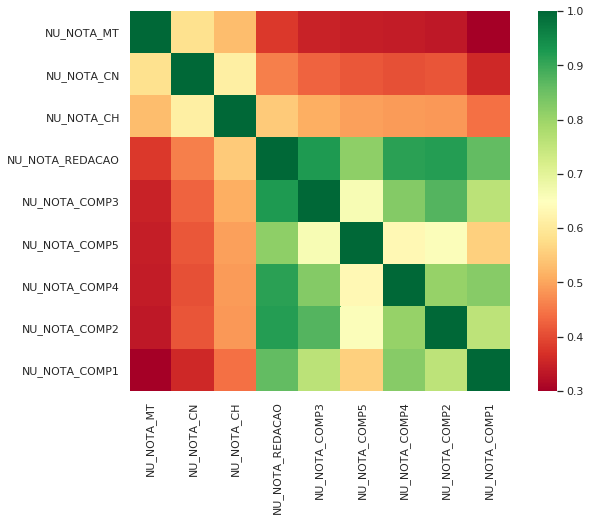

In [51]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(enem_num_corr.corr(), square = True, cmap = 'RdYlGn', ax = ax)
plt.show()
plt.close()

In [52]:
enem_cat = enem_df_final.select_dtypes(include = np.object)
print('As features categoricas são:', enem_cat.columns)

As features categoricas são: Index(['SG_UF_RESIDENCIA', 'TP_SEXO', 'CO_PROVA_CN', 'CO_PROVA_CH',
       'CO_PROVA_LC', 'CO_PROVA_MT', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025',
       'Q026', 'Q047'],
      dtype='object')


In [53]:
enem_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10133 entries, 0 to 10132
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SG_UF_RESIDENCIA  10133 non-null  object
 1   TP_SEXO           10133 non-null  object
 2   CO_PROVA_CN       10133 non-null  object
 3   CO_PROVA_CH       10133 non-null  object
 4   CO_PROVA_LC       10133 non-null  object
 5   CO_PROVA_MT       10133 non-null  object
 6   Q001              10133 non-null  object
 7   Q002              10133 non-null  object
 8   Q006              10133 non-null  object
 9   Q024              10133 non-null  object
 10  Q025              10133 non-null  object
 11  Q026              10133 non-null  object
 12  Q047              10133 non-null  object
dtypes: object(13)
memory usage: 1.0+ MB


In [54]:
enem_cat.sample(5).T

,3736,6651,1344,801,424
SG_UF_RESIDENCIA,MG,SP,MG,BA,SP
TP_SEXO,F,F,F,M,F
CO_PROVA_CN,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,66b1dad288e13be0992bae01e81f71eca1c6e8a6,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,c8328ebc6f3238e06076c481bc1b82b8301e7a3f
CO_PROVA_CH,909237ab0d84688e10c0470e2997348aff585273,f48d390ab6a2428e659c37fb8a9d00afde621889,942ab3dc020af4cf53740b6b07e9dd7060b24164,909237ab0d84688e10c0470e2997348aff585273,f48d390ab6a2428e659c37fb8a9d00afde621889
CO_PROVA_LC,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,01abbb7f1a90505385f44eec9905f82ca2a42cfd
CO_PROVA_MT,767a32545304ed293242d528f54d4edb1369f910,767a32545304ed293242d528f54d4edb1369f910,577f8968d95046f5eb5cc158608e12fa9ba34c85,767a32545304ed293242d528f54d4edb1369f910,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a
Q001,C,C,C,E,E
Q002,B,E,D,E,E
Q006,B,C,C,C,C
Q024,B,A,B,B,B


In [59]:
# lista das features categoricas que serão usadas no input do modelo
cat_list = ['TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']
print(cat_list)

['TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']


Podemos agora seguir com o modelo de regressão linear primeiro separando os dados de treino e teste:


In [61]:
print(num_list, cat_list)

['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP3', 'NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP2', 'NU_NOTA_COMP1'] ['TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']


In [77]:
enem_training = enem_df_final[['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP3', 'NU_NOTA_COMP5', \
                               'NU_NOTA_COMP4', 'NU_NOTA_COMP2', 'NU_NOTA_COMP1','TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']]
enem_training.sample(5).T

,6394,8550,3151,5631,4002
NU_NOTA_MT,376.1,506.3,607.8,416.7,651.6
NU_NOTA_CN,416,447.8,560.5,411.5,588.2
NU_NOTA_CH,529.1,476.2,456,476,638.4
NU_NOTA_REDACAO,420,320,660,340,740
NU_NOTA_COMP3,80,80,120,60,160
NU_NOTA_COMP5,80,0,140,20,120
NU_NOTA_COMP4,60,80,140,80,160
NU_NOTA_COMP2,80,80,120,80,160
NU_NOTA_COMP1,120,80,140,100,140
TP_SEXO,F,M,M,F,F


In [78]:
num_list.remove('NU_NOTA_MT')
print(num_list)

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP3', 'NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP2', 'NU_NOTA_COMP1']


In [79]:
print(enem_training.isnull().sum())

NU_NOTA_MT          0
NU_NOTA_CN         36
NU_NOTA_CH         36
NU_NOTA_REDACAO     0
NU_NOTA_COMP3       0
NU_NOTA_COMP5       0
NU_NOTA_COMP4       0
NU_NOTA_COMP2       0
NU_NOTA_COMP1       0
TP_SEXO             0
Q001                0
Q002                0
Q006                0
Q024                0
Q025                0
Q026                0
Q047                0
dtype: int64


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [81]:
X = enem_training.drop('NU_NOTA_MT', axis = 1)
y = enem_training['NU_NOTA_MT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Pipeline para pré-processamento das variáveis numéricas 

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute        import KNNImputer

In [83]:
# Imputar as notas faltantes, usando KNNImputer
# Standardize features by removing the mean and scaling to unit variance

num_tr= Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors = 3, weights = 'uniform')),
    ('scaler', StandardScaler())
])

### Pipeline para pré-processamento das variáveis categóricas

In [84]:
from sklearn.preprocessing import OneHotEncoder
cat_tr = Pipeline(steps = [
    ('one-hot-encoder', OneHotEncoder())
])

### Compondo os pré-processadores

In [85]:
from sklearn.compose import ColumnTransformer

In [87]:
preprocessor = ColumnTransformer(transformers =[
    ('num', num_tr, num_list),
    ('cat', cat_tr, cat_list)
])

### Criando o modelo pipeline

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

In [89]:
model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('linear_model', LinearRegression(fit_intercept = False))
])

### Treinando o modelo

In [90]:
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
print('Training_score: ', train_score)

Training_score:  0.4454845906583005


### Avaliando o modelo

In [91]:
y_pred = model.predict(X_test)
# Compute and print r2 and RMSE

print('Testing score: {}'.format(r2_score(y_test, y_pred)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(rmse))

Testing score: 0.38814908989101704
Root Mean Squared Error: 77.1881212913764


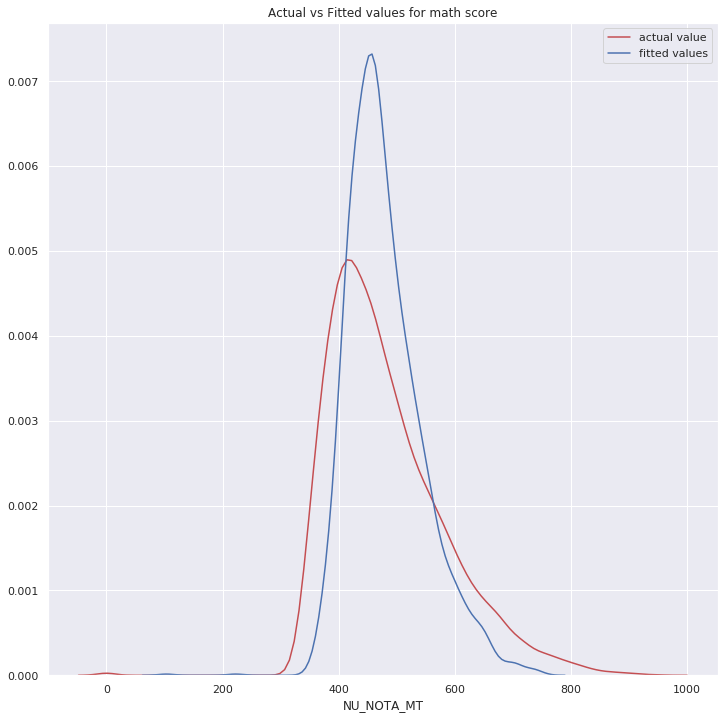

In [92]:
fig, ax = plt.subplots()
ax1 = sns.distplot(enem_df['NU_NOTA_MT'], hist = False, color = 'r', label = 'actual value')
sns.distplot(y_pred, hist = False, color = 'b', label = 'fitted values', ax = ax1)
ax.set_title('Actual vs Fitted values for math score')
ax.set_xlabel('NU_NOTA_MT')
plt.show()
plt.close()

In [95]:
validation= pd.read_csv("test.csv")

In [96]:
validation.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [97]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            4576 non-null   object 
 1   CO_UF_RESIDENCIA        4576 non-null   int64  
 2   SG_UF_RESIDENCIA        4576 non-null   object 
 3   NU_IDADE                4576 non-null   int64  
 4   TP_SEXO                 4576 non-null   object 
 5   TP_COR_RACA             4576 non-null   int64  
 6   TP_NACIONALIDADE        4576 non-null   int64  
 7   TP_ST_CONCLUSAO         4576 non-null   int64  
 8   TP_ANO_CONCLUIU         4576 non-null   int64  
 9   TP_ESCOLA               4576 non-null   int64  
 10  TP_ENSINO               1480 non-null   float64
 11  IN_TREINEIRO            4576 non-null   int64  
 12  TP_DEPENDENCIA_ADM_ESC  1480 non-null   float64
 13  IN_BAIXA_VISAO          4576 non-null   int64  
 14  IN_CEGUEIRA             4576 non-null   

In [98]:
y_preds = model.predict(validation)

/home/fabio/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [99]:
print(y_preds[:5])

[425.1515872  421.23474353 576.87272864 480.21148989 556.22105272]


In [101]:
answer = pd.DataFrame({
    'NU_INSCRICAO'  :   validation['NU_INSCRICAO'],
    'NU_NOTA_MT'    :   y_preds
})

In [102]:
answer.sample(10)

,NU_INSCRICAO,NU_NOTA_MT
223,6d94e9582cfdb5d239f21b3ba08b619d81c5e8aa,606.718900
789,43abfac89c4274d0247013b7f4a72ae44f40b690,609.024260
890,8500865acd482736233a43a6b616705bec5928dc,441.449916
1442,6e6e61a418676943dab9187c8c0a7c7608796ef3,436.550532
2132,8e6c319400800b218957a303350718efb973ea9c,382.161895
3184,34368facff58fa65b7a8a98ab6d194eed27c6888,548.828777
3618,fce9f32ec22885e4680e8e992ec173aaa112d41e,473.859259
497,abafba1eacd1b34ef2e197683cc1d19e7c47cd9d,407.272257
785,97d511faae7f1b529895edcc0801680941372c89,437.124729
2957,e276f34dc8fd34f3d5e5a83941f35d833f82c73f,440.679480


In [103]:
answer.to_csv('answer.csv', index = False)

## Modelo 2

In [104]:
enem_training.head()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_REDACAO,NU_NOTA_COMP3,NU_NOTA_COMP5,NU_NOTA_COMP4,NU_NOTA_COMP2,NU_NOTA_COMP1,TP_SEXO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,399.4,436.3,495.4,520.0,120.0,80.0,80.0,120.0,120.0,M,D,D,C,A,A,C,A
1,459.8,474.5,544.1,580.0,120.0,80.0,120.0,120.0,140.0,F,A,A,B,A,A,A,A
2,364.5,439.7,583.2,620.0,120.0,100.0,160.0,120.0,120.0,F,E,E,C,B,B,A,A
3,529.2,420.1,604.2,560.0,120.0,100.0,120.0,120.0,100.0,F,E,D,C,B,B,C,A
4,566.7,619.6,625.8,620.0,120.0,120.0,120.0,120.0,140.0,F,G,F,L,B,B,A,D


In [105]:
enem_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10133 entries, 0 to 10132
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_NOTA_MT       10133 non-null  float64
 1   NU_NOTA_CN       10097 non-null  float64
 2   NU_NOTA_CH       10097 non-null  float64
 3   NU_NOTA_REDACAO  10133 non-null  float64
 4   NU_NOTA_COMP3    10133 non-null  float64
 5   NU_NOTA_COMP5    10133 non-null  float64
 6   NU_NOTA_COMP4    10133 non-null  float64
 7   NU_NOTA_COMP2    10133 non-null  float64
 8   NU_NOTA_COMP1    10133 non-null  float64
 9   TP_SEXO          10133 non-null  object 
 10  Q001             10133 non-null  object 
 11  Q002             10133 non-null  object 
 12  Q006             10133 non-null  object 
 13  Q024             10133 non-null  object 
 14  Q025             10133 non-null  object 
 15  Q026             10133 non-null  object 
 16  Q047             10133 non-null  object 
dtypes: float64(9

In [106]:
corr_matrix = enem_training.corr()

In [108]:
corr_matrix['NU_NOTA_MT'].sort_values(ascending = False)

NU_NOTA_MT         1.000000
NU_NOTA_CN         0.584941
NU_NOTA_CH         0.529594
NU_NOTA_REDACAO    0.379376
NU_NOTA_COMP3      0.350307
NU_NOTA_COMP5      0.343337
NU_NOTA_COMP4      0.342282
NU_NOTA_COMP2      0.335638
NU_NOTA_COMP1      0.299402
Name: NU_NOTA_MT, dtype: float64

In [115]:
num_features = enem_training[['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP3']]
num_features_list = num_features.columns.tolist()
num_features.head()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_REDACAO,NU_NOTA_COMP3
0,399.4,436.3,495.4,520.0,120.0
1,459.8,474.5,544.1,580.0,120.0
2,364.5,439.7,583.2,620.0,120.0
3,529.2,420.1,604.2,560.0,120.0
4,566.7,619.6,625.8,620.0,120.0


In [117]:
print(num_features_list)

['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP3']


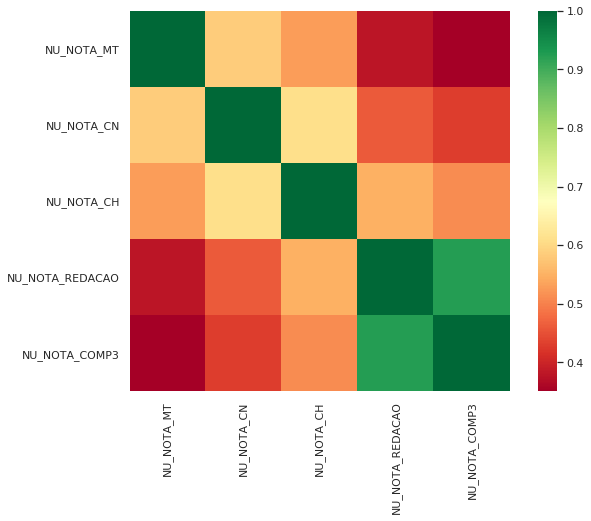

In [114]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(num_features.corr(), square = True, cmap = 'RdYlGn', ax = ax)
plt.show()
plt.close()

In [118]:
enem_training2 = enem_training[['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP3','Q001', 'Q002','Q047']]
enem_training2.sample(5)

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_REDACAO,NU_NOTA_COMP3,Q001,Q002,Q047
8032,675.8,575.3,644.4,840.0,180.0,G,F,D
195,487.9,446.2,462.1,420.0,80.0,B,B,A
6115,502.1,433.5,522.9,620.0,140.0,A,E,A
5651,506.2,460.8,617.3,600.0,140.0,D,C,A
136,383.8,448.1,521.1,500.0,100.0,C,A,A


In [119]:
enem_training2.describe().T

,count,mean,std,min,25%,50%,75%,max
NU_NOTA_MT,10133.0,482.497928,99.826323,0.0,408.9,461.2,537.6,952.0
NU_NOTA_CN,10097.0,473.912509,71.098468,0.0,420.1,460.4,515.1,806.4
NU_NOTA_CH,10097.0,530.346123,73.528309,0.0,481.0,532.6,581.9,807.0
NU_NOTA_REDACAO,10133.0,529.048258,154.294758,0.0,440.0,540.0,600.0,1000.0
NU_NOTA_COMP3,10133.0,106.824238,34.341349,0.0,80.0,120.0,120.0,200.0


In [123]:
cat_features_list = ['Q001', 'Q002', 'Q047']

In [125]:
num_features_list.remove('NU_NOTA_MT')
print(num_features_list, cat_features_list)

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP3'] ['Q001', 'Q002', 'Q047']


In [126]:
X = enem_training2.drop('NU_NOTA_MT', axis = 1)
y = enem_training2['NU_NOTA_MT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Imputar as notas faltantes, usando KNNImputer
# Standardize features by removing the mean and scaling to unit variance

num_tr= Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors = 3, weights = 'uniform')),
    ('scaler', StandardScaler())
])

# Pipeline
cat_tr = Pipeline(steps = [
    ('one-hot-encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers =[
    ('num', num_tr, num_features_list),
    ('cat', cat_tr, cat_features_list)
])


model2 = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('linear_model', LinearRegression(fit_intercept = False))
])


In [127]:
model2.fit(X_train, y_train)
train_score = model2.score(X_train, y_train)
print('Training_score: ', train_score)

Training_score:  0.4188959850797207


In [128]:
y_pred = model2.predict(X_test)
# Compute and print r2 and RMSE

print('Testing score: {}'.format(r2_score(y_test, y_pred)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(rmse))

Testing score: 0.3858005748640584
Root Mean Squared Error: 77.3361180009997


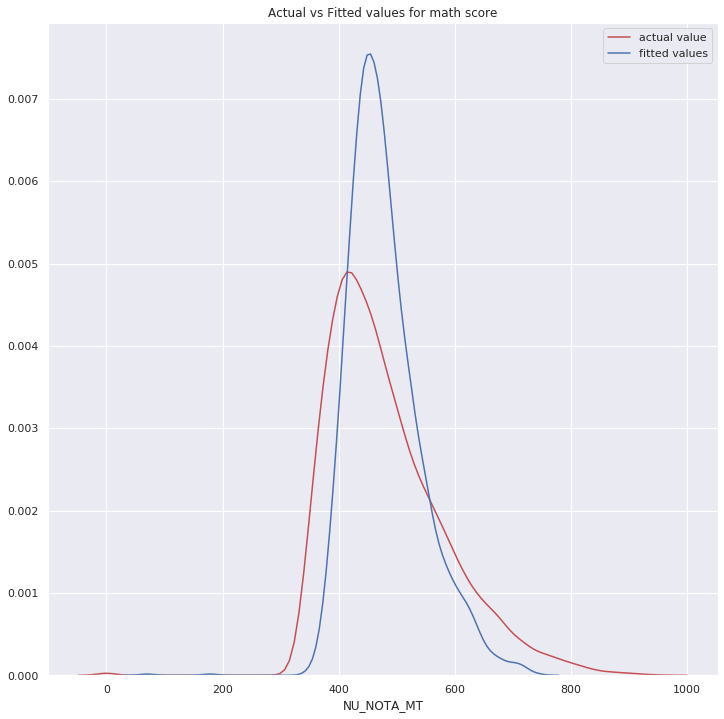

In [129]:
fig, ax = plt.subplots()
ax1 = sns.distplot(enem_training2['NU_NOTA_MT'], hist = False, color = 'r', label = 'actual value')
sns.distplot(y_pred, hist = False, color = 'b', label = 'fitted values', ax = ax1)
ax.set_title('Actual vs Fitted values for math score')
ax.set_xlabel('NU_NOTA_MT')
plt.show()
plt.close()

In [130]:
y_preds = model2.predict(validation)

/home/fabio/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [131]:
answer = pd.DataFrame({
    'NU_INSCRICAO'  :   validation['NU_INSCRICAO'],
    'NU_NOTA_MT'    :   y_preds
})
answer.sample(10)

,NU_INSCRICAO,NU_NOTA_MT
4334,d3fc0a5b437f18e94209eba94814777ae5bb9050,478.585559
2594,be5ba4c4aa6628688aa6402e8d97c28ddad1681a,499.545335
3382,8bb1dde7074b45aaa6e0f52a92f0a0f555d2cc58,435.965431
3956,1692c679d7772327a03e4a0876288f7b93f154b5,564.996116
2238,5b5b113b2598a9b93ccce2777256dd0c6f080145,474.929720
1130,6e85f5878fde0da41bcbdeb1050e561c334bc31f,480.581030
2066,53384c42f884deb82fa1670340c5a46fcfe74d08,405.609958
2290,88b2df87e6e0a8c9272d26276986e4854cc0a516,471.042849
3267,509d0195fef20cbb3dd6745ec5ca45d1a37e0b36,501.780676
2725,8d1967edeeea7561710452a89b98f1baffc32a6a,431.419620


In [132]:
answer.to_csv('answer.csv', index = False)

In [133]:
enem_training3 = enem_training2[['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO', 'Q001']]
num_features_list = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO']
cat_features_list = ['Q001']

In [134]:
enem_training3.sample(5)

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_REDACAO,Q001
1247,366.0,507.3,454.0,480.0,A
2945,527.7,424.7,518.7,560.0,E
4629,405.7,443.9,419.1,480.0,H
9535,379.7,538.5,506.3,580.0,D
7676,486.0,461.9,436.0,620.0,B


In [137]:
X = enem_training3.drop('NU_NOTA_MT', axis = 1)
y = enem_training3['NU_NOTA_MT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Imputar as notas faltantes, usando KNNImputer
# Standardize features by removing the mean and scaling to unit variance

num_tr= Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors = 3, weights = 'uniform')),
    ('scaler', StandardScaler())
])

# Pipeline
cat_tr = Pipeline(steps = [
    ('one-hot-encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers =[
    ('num', num_tr, num_features_list),
    ('cat', cat_tr, cat_features_list)
])


model3 = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('linear_model', LinearRegression(fit_intercept = False))
])

In [138]:
model3.fit(X_train, y_train)
train_score = model3.score(X_train, y_train)
print('Training_score: ', train_score)

y_pred = model3.predict(X_test)
# Compute and print r2 and RMSE

print('Testing score: {}'.format(r2_score(y_test, y_pred)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(rmse))

Training_score:  0.4093199131925249
Testing score: 0.3792364379250862
Root Mean Squared Error: 77.74827707259729


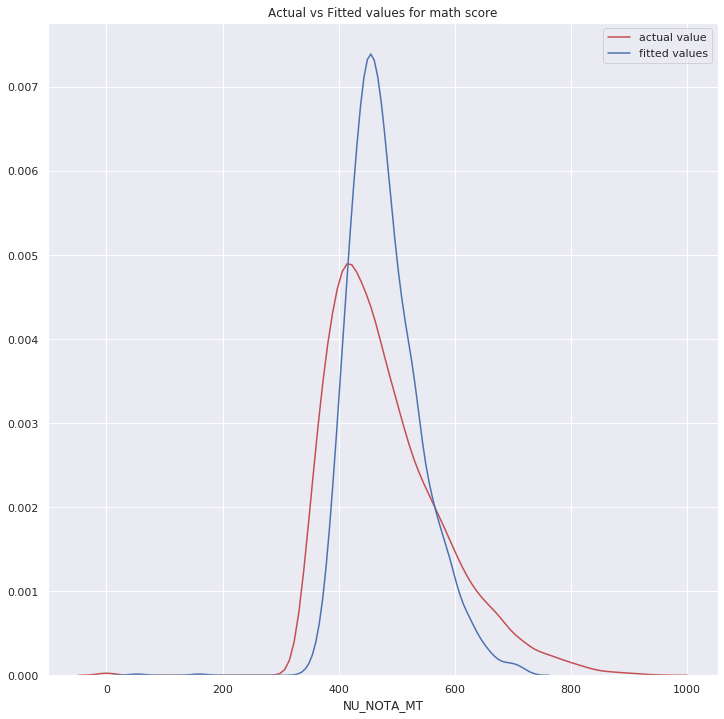

In [140]:
fig, ax = plt.subplots()
ax1 = sns.distplot(enem_training3['NU_NOTA_MT'], hist = False, color = 'r', label = 'actual value')
sns.distplot(y_pred, hist = False, color = 'b', label = 'fitted values', ax = ax1)
ax.set_title('Actual vs Fitted values for math score')
ax.set_xlabel('NU_NOTA_MT')
plt.show()
plt.close()

In [141]:
y_preds = model3.predict(validation)
answer = pd.DataFrame({
    'NU_INSCRICAO'  :   validation['NU_INSCRICAO'],
    'NU_NOTA_MT'    :   y_preds
})
answer.sample(10)

/home/fabio/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


,NU_INSCRICAO,NU_NOTA_MT
458,6432732876989f4279e03bea20c37a21e0ce488d,672.478247
4008,cc1a22f0429db012932076d5552e429acbb97610,429.743568
3341,c3b255b4dbfc50d5cfe0493c336af4c3114c2077,435.445707
2596,57b58443cda566f5cf3bd4e500b8623eb9709975,530.481643
1947,f0b438ae03abeec74f8cb475f4a68f1f9d7b8268,479.531249
3802,8f211dc328e1b6fd9dbc8a3e9599bb952273aa69,459.910580
1937,1356f08e2a9640756510347515ee56b39a3da104,422.450657
3806,148e3ef8c2a7052b7a54c05c17e9a64b03dcc958,488.326278
3338,7ac6ceee009e08ed472d8a02d77cbfc46b04fc79,472.763956
694,d6e8ae681d8fcac98ecba4cd0b16622ef1533741,482.075132


In [142]:
answer.to_csv('answer.csv', index = False)

## Modelo 4

In [143]:
enem_training4 = enem_training[['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP3']]
enem_training4.sample(10)

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_REDACAO,NU_NOTA_COMP3
5646,410.6,407.7,449.7,500.0,80.0
216,547.0,422.3,542.3,580.0,120.0
1522,349.3,491.1,579.2,920.0,200.0
2952,542.1,514.1,574.8,400.0,80.0
5380,584.1,507.7,583.2,680.0,140.0
3886,403.7,409.1,509.0,560.0,100.0
4325,487.6,611.8,636.9,760.0,160.0
7277,750.2,616.3,644.7,740.0,160.0
1023,517.2,503.9,527.4,540.0,80.0
6582,476.2,514.5,531.3,520.0,120.0


In [145]:
enem_training4.isna().sum()

NU_NOTA_MT          0
NU_NOTA_CN         36
NU_NOTA_CH         36
NU_NOTA_REDACAO     0
NU_NOTA_COMP3       0
dtype: int64

In [152]:
enem_training4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10133 entries, 0 to 10132
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_NOTA_MT       10133 non-null  float64
 1   NU_NOTA_CN       10097 non-null  float64
 2   NU_NOTA_CH       10097 non-null  float64
 3   NU_NOTA_REDACAO  10133 non-null  float64
 4   NU_NOTA_COMP3    10133 non-null  float64
dtypes: float64(5)
memory usage: 395.9 KB


In [153]:
num_features_list = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP3']

In [154]:
X = enem_training4.drop('NU_NOTA_MT', axis = 1)
y = enem_training4['NU_NOTA_MT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Imputar as notas faltantes, usando KNNImputer
# Standardize features by removing the mean and scaling to unit variance

num_tr= Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors = 3, weights = 'uniform')),
    ('scaler', StandardScaler())
])

# Pipeline

preprocessor = ColumnTransformer(transformers =[
    ('num', num_tr, num_features_list)
])


model4 = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('linear_model', LinearRegression(fit_intercept = True))
])

In [155]:
model4.fit(X_train, y_train)
train_score = model4.score(X_train, y_train)
print('Training_score: ', train_score)

y_pred = model4.predict(X_test)
# Compute and print r2 and RMSE

print('Testing score: {}'.format(r2_score(y_test, y_pred)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(rmse))

Training_score:  0.39520243765660756
Testing score: 0.3634446150113696
Root Mean Squared Error: 78.73099927282158


In [157]:
y_preds = model4.predict(validation)
answer = pd.DataFrame({
    'NU_INSCRICAO'  :   validation['NU_INSCRICAO'],
    'NU_NOTA_MT'    :   y_preds
})
answer.sample(10)

/home/fabio/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


,NU_INSCRICAO,NU_NOTA_MT
2603,cc1018598e1fc9a11fc3e0f37b20afa3148783ba,482.935899
4566,ff617d0a9dcb32a68dc35b18ad222fc4a2fb21dc,473.916721
2033,20a89323fa365fe08f641cfae48e56fc867f0653,482.935899
1579,306994c5a4709fc9524805e27a94b0af37b710d6,445.546044
1206,e34e38ff42f2e49861b2ba1efdf8c5f107f05fb3,482.935899
1888,ff66c579488371b92cf83705b37228455ecd7d77,517.281379
4209,36f493fa8a43d76bc2d30b4b7f0594652c6de6d8,447.382991
382,cf62916c9829bd3ad05104151eee856d6de7ca1c,604.209440
143,c32e484025571dd94255a77f21de08ab8d2aaba8,486.423682
629,0ce55320384c07cfa81d4f30ce0d5f9bc969f3bb,624.029323


In [158]:
answer.to_csv('answer.csv', index = False)

In [160]:
enem_num_features.head()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_SURDEZ,...,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,43,24,1,1,1,4,1,0,0,0,...,581.2,399.4,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0
1,23,17,3,1,2,0,2,0,0,0,...,599.0,459.8,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0
2,29,18,1,1,1,1,1,0,0,0,...,410.9,364.5,0,1.0,120.0,120.0,120.0,160.0,100.0,620.0
3,51,18,3,1,2,0,2,0,0,0,...,484.5,529.2,0,1.0,100.0,120.0,120.0,120.0,100.0,560.0
4,43,18,1,1,1,1,1,0,0,0,...,611.2,566.7,0,1.0,140.0,120.0,120.0,120.0,120.0,620.0


In [165]:
corr_matrix = enem_num_features.corr()
print(corr_matrix['NU_NOTA_MT'].sort_values(ascending = False))

NU_NOTA_MT           1.000000
NU_NOTA_CN           0.584941
NU_NOTA_CH           0.529594
NU_NOTA_LC           0.494695
NU_NOTA_REDACAO      0.379376
NU_NOTA_COMP3        0.350307
NU_NOTA_COMP5        0.343337
NU_NOTA_COMP4        0.342282
NU_NOTA_COMP2        0.335638
NU_NOTA_COMP1        0.299402
CO_UF_RESIDENCIA     0.107493
TP_ESCOLA            0.069304
TP_ANO_CONCLUIU      0.029039
IN_DISCALCULIA       0.009813
TP_PRESENCA_CH       0.003552
TP_PRESENCA_CN       0.003552
IN_DISLEXIA          0.001453
IN_BAIXA_VISAO       0.000685
IN_GESTANTE         -0.000945
IN_IDOSO            -0.011336
IN_SURDEZ           -0.015249
IN_SABATISTA        -0.016459
IN_TREINEIRO        -0.022287
TP_NACIONALIDADE    -0.034965
TP_STATUS_REDACAO   -0.059376
NU_IDADE            -0.061485
TP_ST_CONCLUSAO     -0.087869
TP_COR_RACA         -0.157364
TP_LINGUA           -0.201726
Name: NU_NOTA_MT, dtype: float64


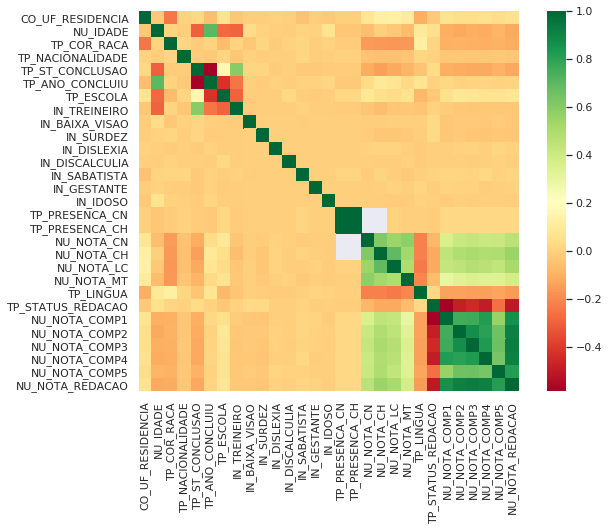

In [163]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(corr_matrix, square = True, cmap = 'RdYlGn', ax = ax)
plt.show()
plt.close()

In [174]:
enem_training5 = enem_num_features.copy()
num_features_list = enem_training5.columns.tolist()
num_features_list.remove('NU_NOTA_MT')
print(num_features_list)

['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']


In [177]:
X = enem_training5.drop('NU_NOTA_MT', axis = 1)
y = enem_training5['NU_NOTA_MT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Imputar as notas faltantes, usando KNNImputer
# Standardize features by removing the mean and scaling to unit variance

num_tr= Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors = 3, weights = 'uniform'))
#   ('scaler', StandardScaler())
])

# Pipeline

preprocessor = ColumnTransformer(transformers =[
   answer.to_csv('answer.csv', index = False) ('num', num_tr, num_features_list)
])


model5 = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('linear_model', LinearRegression(fit_intercept = False))
])

In [178]:
model5.fit(X_train, y_train)
train_score = model5.score(X_train, y_train)
print('Training_score: ', train_score)

y_pred = model5.predict(X_test)
# Compute and print r2 and RMSE

print('Testing score: {}'.format(r2_score(y_test, y_pred)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(rmse))

Training_score:  0.4155146120036298
Testing score: -160485645.6214252
Root Mean Squared Error: 1250102.9028147757


In [179]:
y_preds = model5.predict(validation)
answer = pd.DataFrame({
    'NU_INSCRICAO'  :   validation['NU_INSCRICAO'],
    'NU_NOTA_MT'    :   y_preds
})
answer.sample(10)

/home/fabio/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


,NU_INSCRICAO,NU_NOTA_MT
1898,6f3c39ad7d70a21397b82f781d22b15c0eb19756,478.250
1224,4edfc1f4a0e7eb1d527d38c7bb3d3dddf6236042,419.500
2435,d1937748cc2c90942de393c34c2255137c803eb2,497.250
2225,a509da1742da36cc89290f268031173d6c02dc63,416.625
1976,72466bbb9932738ed63ed91cef5253d80fdcb2a8,550.500
4210,78e07697bc76e15d90dcfcb9c2d0a88931b9f72a,480.875
605,d3b6fda859d86b1c0dfc09cd748af1efc74065db,496.500
913,3c69a9f903494bc62eab1f114782bf8eb8380e95,484.500
1573,ccfcddbccae2f62337b49b9e6657ad5b6e9a599b,473.500
4207,fb17ce23125facd0bd44e9f9877590f1999504d6,499.125


In [180]:
answer.to_csv('answer.csv', index = False)